In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-ii/online_retail_II.xlsx


**Unveiling Customer Insights through RFM Analysis
Embark on a journey to uncover profound customer insights as we delve into the world of online retail using the "Online Retail II" dataset. In this analysis, our spotlight will be on the powerful RFM framework – Recency, Frequency, and Monetary Value. RFM analysis is a strategic approach that enables businesses to understand and segment their customer base based on their recent transactional behavior, purchase frequency, and monetary contribution.

The Essence of RFM Analysis
Recency (R): Shining a light on the temporal aspect, Recency evaluates how recently a customer made a purchase. It provides a glimpse into customer engagement and loyalty.

Frequency (F): Frequency explores the number of transactions a customer has conducted. It unveils insights into customer loyalty and the habitual nature of purchasing.

Monetary Value (M): Monetary Value signifies the total amount a customer has spent. It showcases the economic contribution of each customer to the business.

Unraveling Customer Segmentation
Through RFM analysis, we aim to segment customers into distinct groups, each with its unique characteristics and behaviors. This segmentation will empower us to tailor marketing strategies, enhance customer experiences, and identify high-value segments deserving special attention.

Join us in deciphering the stories encrypted in the RFM metrics and understanding the heartbeat of our online retail ecosystem.

Dataset; 

Invoice: Represents the invoice number, a unique identifier for each transaction.

Stock Code: Represents the stock code of the product. Each product is identified by a unique stock code.

Description: Contains the description of the product. It includes text that describes the name or features of each product.

Quantity: Represents the quantity of each product in the sales invoice. Positive numbers indicate sales, while negative numbers represent returns or cancellations.

InvoiceDate: Contains the date and time information of the invoice. Indicates when the transaction took place.

Price: Represents the unit price of the product. Multiplied by the "Quantity" to calculate the total invoice amount.

CustomerID: Unique identifier for the customer. Allows tracking and analyzing sales specific to each customer.

Country: Represents the country where the transaction occurred. Specifies the geographic location of the customer.****

In [2]:
#Loading data
data = pd.read_excel('/kaggle/input/online-retail-ii/online_retail_II.xlsx')
print(data.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [6]:
#we want to see if there are empty columns
data.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
data.value_counts()

Invoice  StockCode  Description                          Quantity  InvoiceDate          Price  Customer ID  Country       
496431   84826      ASSTD DESIGN 3D PAPER STICKERS        1        2010-02-01 12:30:00  0.85   16415.0      United Kingdom    6
525065   20894      HANGING BAUBLE T-LIGHT HOLDER LARGE   1        2010-10-03 14:28:00  2.95   16799.0      United Kingdom    6
502660   17021      NAMASTE SWAGAT INCENSE                6        2010-03-25 17:18:00  0.30   13187.0      United Kingdom    6
534219   35953      FOLKART STAR CHRISTMAS DECORATIONS    1        2010-11-21 16:13:00  1.25   13230.0      United Kingdom    6
492784   22114      HOT WATER BOTTLE TEA AND SYMPATHY     1        2009-12-18 17:24:00  3.95   17841.0      United Kingdom    5
                                                                                                                             ..
507227   84970S     HANGING HEART ZINC T-LIGHT HOLDER     24       2010-05-06 19:49:00  0.85   15955.0      U

In [8]:
data.count()

Invoice        525461
StockCode      525461
Description    522533
Quantity       525461
InvoiceDate    525461
Price          525461
Customer ID    417534
Country        525461
dtype: int64

In [9]:
#We add total spend as a column
data['TotalPrice'] = data['Price'] * data['Quantity']
data['TotalPrice']

0          83.40
1          81.00
2          81.00
3         100.80
4          30.00
           ...  
525456      5.90
525457      3.75
525458      3.75
525459      7.50
525460      3.90
Name: TotalPrice, Length: 525461, dtype: float64

In [10]:
#We change the data type of the order date
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].dtype
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
TotalPrice            float64
dtype: object

In [11]:
#we take values greater than #0.
data = data[data['Quantity'] >0 ]
data = data[data['TotalPrice'] >0 ]
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [12]:
#We find the values for Recency and Monetary.
today = pd.to_datetime('2012-1-1')
data_x = data.groupby('Customer ID').agg({'TotalPrice': lambda x: x.sum(),
                                        'InvoiceDate': lambda x: (today - x.max()).days})
print(data_x)

             TotalPrice  InvoiceDate
Customer ID                         
12346.0          372.86          551
12347.0         1323.32          389
12348.0          222.16          460
12349.0         2671.14          429
12351.0          300.93          397
...                 ...          ...
18283.0          641.77          404
18284.0          461.68          453
18285.0          427.00          682
18286.0         1296.43          498
18287.0         2345.71          404

[4312 rows x 2 columns]


In [13]:
#Since the data is based on StockCode, we make InvoiceNo unique.
data_y = data.groupby(['Customer ID','Invoice']).agg({'TotalPrice': lambda x: x.sum()})
print(data_y)

                     TotalPrice
Customer ID Invoice            
12346.0     491725        45.00
            491742        22.50
            491744        22.50
            492718        22.50
            492722         1.00
...                         ...
18286.0     519785       833.48
18287.0     508581      1071.61
            523289       862.00
            523290        30.60
            534346       381.50

[19213 rows x 1 columns]


In [14]:
#To ensure uniqueness in the 'Invoice' field
data_z = data_y.groupby('Customer ID').agg({'TotalPrice': lambda x: len(x)})
print(data_z)

             TotalPrice
Customer ID            
12346.0              11
12347.0               2
12348.0               1
12349.0               3
12351.0               1
...                 ...
18283.0               6
18284.0               1
18285.0               1
18286.0               2
18287.0               4

[4312 rows x 1 columns]


In [15]:
# We have reached the RFM table.
rfm_table= pd.merge(data_x,data_z, on='Customer ID')
print(rfm_table)

             TotalPrice_x  InvoiceDate  TotalPrice_y
Customer ID                                         
12346.0            372.86          551            11
12347.0           1323.32          389             2
12348.0            222.16          460             1
12349.0           2671.14          429             3
12351.0            300.93          397             1
...                   ...          ...           ...
18283.0            641.77          404             6
18284.0            461.68          453             1
18285.0            427.00          682             1
18286.0           1296.43          498             2
18287.0           2345.71          404             4

[4312 rows x 3 columns]


In [16]:
#We determine the column names
rfm_table.rename(columns= {'InvoiceDate': 'Recency',
                          'TotalPrice_y': 'Frequency',
                          'TotalPrice_x': 'Monetary'}, inplace= True)
rfm_table.head()

,Monetary,Recency,Frequency
Customer ID,,,
12346.0,372.86,551,11
12347.0,1323.32,389,2
12348.0,222.16,460,1
12349.0,2671.14,429,3
12351.0,300.93,397,1


In [17]:
#Frequency finding
def RScore(x,p,d):
    if x <= d[p][0.20]:
        return 0
    elif x <= d[p][0.40]:
        return 1
    elif x <= d[p][0.60]: 
        return 2
    elif x <= d[p][0.80]:
        return 3
    else:
        return 4
quantiles = rfm_table.quantile(q=[0.20,0.40,0.60,0.80])
quantiles = quantiles.to_dict()
rfm_table['Freq_Tile'] = rfm_table['Frequency'].apply(RScore, args=('Frequency',quantiles,))
#Recency finding
rfm_table = rfm_table.sort_values('Recency',ascending=True)
rfm_table['Rec_Tile'] = pd.qcut(rfm_table['Recency'],5,labels=False)
#Monetary finding
#rfm_table.sort_values('Monetary',ascending=False)
rfm_table['Mone_Tile'] = pd.qcut(rfm_table['Monetary'],5,labels=False)
#If we do not want to include the value 'zero', we increase the values we find by 1
rfm_table['Rec_Tile'] = rfm_table['Rec_Tile'] + 1
rfm_table['Freq_Tile'] = rfm_table['Freq_Tile'] + 1
rfm_table['Mone_Tile'] = rfm_table['Mone_Tile'] + 1
#We combine the values to get a single score
rfm_table['RFM Score'] = rfm_table['Rec_Tile'].map(str) + rfm_table['Freq_Tile'].map(str) + rfm_table['Mone_Tile'].map(str)
rfm_table.head()

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
Customer ID,,,,,,,
14932.0,666.13,387,2,2,1,3,123
14667.0,12685.94,387,31,5,1,5,155
17097.0,386.03,387,2,2,1,2,122
15288.0,1576.61,387,6,4,1,4,144
17950.0,950.61,387,6,4,1,3,143


In [18]:
#We examine the content of values.
rfm_table.groupby('RFM Score').agg({
'Recency': ['mean','min','max','count'],
'Frequency': ['mean','min','max','count'],
'Monetary': ['mean','min','max','count'] }).round(1).head()

Recency                 Frequency               Monetary          \
             mean  min  max count      mean min max count     mean     min   
RFM Score                                                                    
111         395.3  388  401    44       1.0   1   1    44    143.8    11.0   
112         394.7  387  401    35       1.0   1   1    35    341.9   255.0   
113         394.5  388  400     6       1.0   1   1     6    781.4   590.0   
114         397.3  394  401     3       1.0   1   1     3   1367.9  1056.6   
115         396.0  396  396     1       1.0   1   1     1   2945.4  2945.4   

                         
              max count  
RFM Score                
111         247.4    44  
112         487.8    35  
113         949.8     6  
114        1938.4     3  
115        2945.4     1

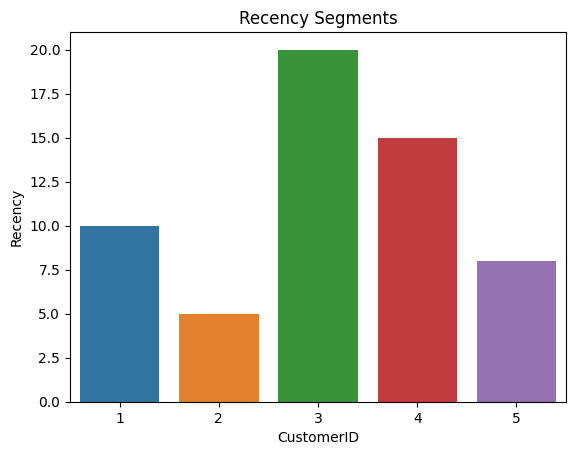

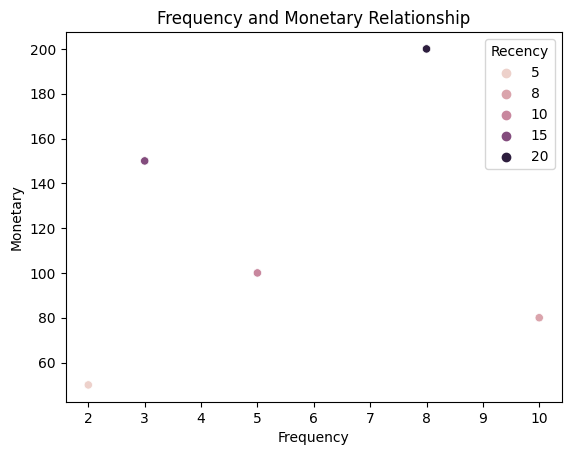

In [19]:
# Let's create a sample DataFrame (customer ID, Recency, Frequency, Monetary)
data = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5],
    'Recency': [10, 5, 20, 15, 8],
    'Frequency': [5, 2, 8, 3, 10],
    'Monetary': [100, 50, 200, 150, 80]
})
# Bar chart showing the number of customers by segment
sns.barplot(x='CustomerID', y='Recency', data=data)
plt.title('Recency Segments')
plt.show()
# Scatter plot showing Frequency and Monetary relationship between customer segments
sns.scatterplot(x='Frequency', y='Monetary', hue='Recency', data=data)
plt.title('Frequency and Monetary Relationship')
plt.show()